# Exercise 1 Implementation

In [5]:
# Imports
import scipy.io as sio # Check, might not need this!!
import numpy as np
import matplotlib.pyplot as plt

#hello 

# Load the source file with the face data
mat_content = sio.loadmat('face.mat')

mat_content # Let's see the content... 

{'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

In [6]:
# Store face data and classification
face_data = mat_content['X']
face_label = mat_content['l'] # Not actually used for PCA training, needed for testing

# Append the matching data and labels to array 'faces': unnecessary for PCA training as the labels are not used (unsupervised learning)
# But we need it later for assessing our algorithms during testing
faces = np.append(face_data, face_label, axis=0)

# Check data and correct dimensions
print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape) # 520 data points in 2576 dimensions
print (face_label)
print (face_label.shape) # 520 data points
print(faces)
print(faces.shape)

#Transpose in preparation for division into training and testing material
faces_transposed = faces.T
print (faces_transposed, faces_transposed.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

[[116 116 119 ...  39  40  25]
 [ 57  56  56 ... 157 152  39]
 [254 253 253 ...  43  44  38]
 ...
 [148 143 116 ...  94  67  31]
 [ 62  67  59 ... 167 168  26]
 [ 74  75  68 ... 159 166   2]] (520, 2577)
[[116 116 119 ...  39  40  25]
 [ 57  56  56 ... 157 152  39]
 [254 253 253 ...  43  44  38]
 ...
 [194 123 134 ... 237 231  42]
 [142  91  97 ...  51  35   3]
 [142 134 138 ...  74  69  31]] (416, 2577)
[[121 111 145 ... 132 133  43]
 [ 86  88  82 ... 131 108  10]
 [ 19   9  11 ... 147 133   4]
 ...
 [148 143 116 ...  94  67  31]
 [ 62  67  59 ... 167 168  26]
 [ 74  75  68 ... 159 166   2]] (104, 2577)
[113 116 116 ... 142 145  35] (2577,)
[[113 116 116 ... 242 244 106]
 [117 116 116 ... 245 179  50]
 [118 117 117 ... 249 109  46]
 ...
 [126 127 125 ... 131 136 137]
 [130 130 126 ... 134 138 141]
 [132 131 132 ... 138 142 145]] (46, 56)


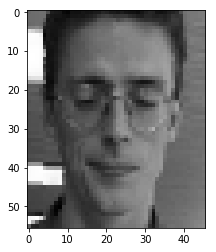

In [8]:
#Divide the data set into training and testing sets: 80% is training, 20% is testing
np.random.shuffle(faces_transposed) #Shuffles the rows!! (This is why we transposed)
print(faces_transposed, faces_transposed.shape)
training, test = faces_transposed[:416,:], faces_transposed[416:,:]
print (training, training.shape)
print (test, test.shape)
image_99 = faces_transposed[99]
print(image_99, image_99.shape)
image_99 = np.reshape(image_99[:2576], (46, 56))
print (image_99, image_99.shape)
plt.imshow(image_99.T, cmap = 'gist_gray') # It is a person, so the data manipulation makes sense so far
#plt.figure()
#plt.imshow(np.reshape(faces_transposed[100, :2576], (46,56)).T, cmap = 'gist_gray') # print 100th image as a sanity check to make sure we have shuffled along the right dimension of the array

[[116 116 119 ...  39  39  40]
 [ 57  56  56 ... 168 157 152]
 [254 253 253 ...  45  43  44]
 ...
 [194 123 134 ... 153 237 231]
 [142  91  97 ...  74  51  35]
 [142 134 138 ...  77  74  69]] (416, 2576)
[124.33413462 124.125      121.80048077 ...  82.57211538  80.99519231
  79.6875    ] (2576,)


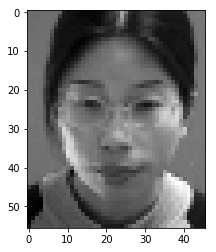

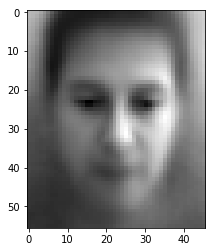

In [10]:
# Now let's start image recognition by PCA
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for scale, orientation and translation

# First, we only need the training face set without the labels
# Images are represented as rows of the array 'pca_train'
pca_train = training [:, :2576]
print (pca_train, pca_train.shape)
plt.imshow(np.reshape(pca_train[0, :], (46,56)).T, cmap = 'gist_gray') # show the first face image

# Let's compute the average face vector
avg_face = np.mean(pca_train, axis=0)
print (avg_face, avg_face.shape)
plt.figure()
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[ -8.33413462  -8.125       -2.80048077 ... -43.57211538 -41.99519231
  -39.6875    ]
 [-67.33413462 -68.125      -65.80048077 ...  85.42788462  76.00480769
   72.3125    ]
 [129.66586538 128.875      131.19951923 ... -37.57211538 -37.99519231
  -35.6875    ]
 ...
 [ 69.66586538  -1.125       12.19951923 ...  70.42788462 156.00480769
  151.3125    ]
 [ 17.66586538 -33.125      -24.80048077 ...  -8.57211538 -29.99519231
  -44.6875    ]
 [ 17.66586538   9.875       16.19951923 ...  -5.57211538  -6.99519231
  -10.6875    ]] (416, 2576)
[[1063468.55528846 1002144.625       907715.73317308 ... -170637.52403846
  -196991.33173077 -189497.5625    ]
 [1002144.625      1113159.5        1047397.375      ... -179596.75
  -213384.75       -207827.75      ]
 [ 907715.73317308 1047397.375      1108292.43990385 ... -192650.51442308
  -220550.39903846 -215524.9375    ]
 ...
 [-170637.52403846 -179596.75       -192650.51442308 ... 1160919.83653846
  1120333.14423077 1055300.375     ]
 [-196991.3317307

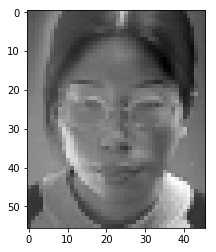

In [12]:
# Now let's subtract the mean face from all of our face images

pca_train_norm = pca_train-avg_face # works because of broadcasting
print (pca_train_norm, pca_train_norm.shape)
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# show the first normalised face image and compare it to the previously printed image: not the same

# Computing the covariance matrix
cov = np.dot(pca_train_norm.T, pca_train_norm)
print (cov, cov.shape)
cov = cov/416
print (cov, cov.shape)

[9.18996711e+05+0.0000000e+00j 5.30578418e+05+0.0000000e+00j
 4.58138675e+05+0.0000000e+00j ... 3.25259842e-13-6.6777521e-14j
 2.83885794e-13+0.0000000e+00j 1.83147187e-13+0.0000000e+00j] (2576,)
[[ 1.12587501e-02+0.00000000e+00j -1.44934041e-02+0.00000000e+00j
  -1.55265759e-02+0.00000000e+00j ... -1.24112799e-03-3.35729440e-04j
  -1.01343955e-03+0.00000000e+00j -6.96234813e-04+0.00000000e+00j]
 [ 1.27822969e-02+0.00000000e+00j -1.47973615e-02+0.00000000e+00j
  -1.71302391e-02+0.00000000e+00j ...  7.82406197e-04-6.07653994e-05j
   7.61585074e-04+0.00000000e+00j  2.96421538e-04+0.00000000e+00j]
 [ 1.42266006e-02+0.00000000e+00j -1.48136952e-02+0.00000000e+00j
  -1.92480708e-02+0.00000000e+00j ... -1.17404081e-04-2.63474131e-04j
  -1.76380900e-04+0.00000000e+00j -5.81863186e-05+0.00000000e+00j]
 ...
 [-3.77383093e-03+0.00000000e+00j  4.75081532e-02+0.00000000e+00j
   1.94152694e-04+0.00000000e+00j ... -7.31707315e-03-2.33151099e-03j
  -1.32912717e-02+0.00000000e+00j  2.51809719e-03+0.00

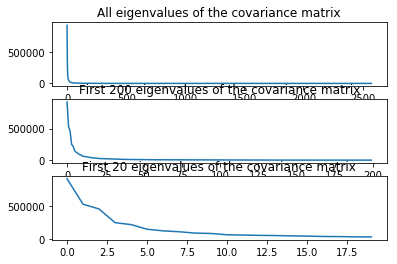

In [13]:
# Computing the eigenvalues and eigenvectors of the covariance matrix
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we order them and the corresponding eigenvalues
print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)

# take absolute value of the complex eigenvalues so that ordering them makes sense
eigvals = abs(eigvals)
print (eigvals, eigvals.shape)

# order them
print (eigvals.argsort(), eigvals.argsort().shape)
index = eigvals.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
print (index, index.shape)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]

x = np.arange(0, 2576)
print (x, x.shape)
print (eigvals, eigvals.shape)

# plot them
plt.subplot(3, 1, 1)
plt.plot(x, eigvals) # clearly out of scale, so let's just take the first 200 of them
plt.title('All eigenvalues of the covariance matrix')

plt.subplot(3, 1, 2)
plt.plot(x[:200], eigvals[:200]) # still out of scale, so let's just take the first 20 of them
plt.title('First 200 eigenvalues of the covariance matrix')

plt.subplot(3, 1, 3)
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.show()

In [40]:
# We just keep the first n eigenvectors and eigenvalues

n = 500
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]
print (eigvecs_best, eigvecs_best.shape)
print (eigvals_best, eigvals_best.shape)

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], abs(eigvecs_best))
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[-0.01184111+0.j          0.01179055+0.j         -0.01671317+0.j
  ...  0.00258776-0.00252627j  0.00258776+0.00252627j
  -0.00643122+0.0033974j ]
 [-0.01311302+0.j          0.01115454+0.j         -0.01747608+0.j
  ... -0.00287677-0.00403543j -0.00287677+0.00403543j
  -0.00265865+0.00121782j]
 [-0.01369716+0.j          0.01014372+0.j         -0.01956419+0.j
  ... -0.00365036+0.00210883j -0.00365036-0.00210883j
  -0.003983  -0.00068367j]
 ...
 [ 0.00588387+0.j         -0.04832684+0.j          0.00896897+0.j
  ...  0.00229572+0.00444414j  0.00229572-0.00444414j
   0.00807314+0.03070791j]
 [ 0.00619546+0.j         -0.04737536+0.j          0.0097198 +0.j
  ...  0.01308205+0.01032753j  0.01308205-0.01032753j
  -0.00635302+0.01524286j]
 [ 0.00598211+0.j         -0.04689749+0.j          0.01125619+0.j
  ... -0.00493942+0.04500044j -0.00493942-0.04500044j
  -0.00478409-0.02906701j]] (2576, 500)
[9.20413403e+05 5.46717154e+05 4.62295788e+05 2.50827480e+05
 2.02555191e+05 1.50025145e+05 1.244609

[[  285.23792789   592.62794074    64.78034571 ...   377.11289153
    377.11289153   361.86482208]
 [ -822.63967068 -1165.55527394  -829.84500159 ...  -956.73792068
   -956.73792068  -965.3816653 ]
 [  382.31650794   446.08376111   432.9754115  ...   387.96091848
    387.96091848   431.94900242]
 ...
 [ 1558.46577147   328.29846939   824.12772503 ...  1109.56917774
   1109.56917774  1100.50141246]
 [-1093.56674657  -914.55256134  -199.05595384 ...  -920.08223419
   -920.08223419  -961.79751446]
 [ 1710.56465907  1420.75788436  1010.66722525 ...  1544.00905512
   1544.00905512  1585.35832144]] (416, 500)


[-9429.96492628 -8517.91779197 -8056.35814756 ... -8744.89748707
 -9178.01254147 -9991.98989702] (2576,)


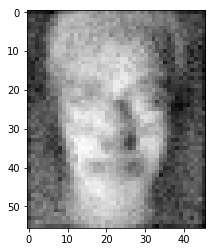

In [42]:
# Let's try to reconstruct one face image, just as a sanity check to see if it is still the same face (worse quality of course, because we did a lossy transformation on it)
face_check = avg_face + np.dot(abs(eigvecs_best), proj_pca_train_norm[414, :])
print (face_check, face_check.shape)
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

In [30]:
face_157 = face_data[:,157]

print(face_157.shape)
print(face_157)

(2576,)
[ 55  55  54 ... 168 168 174]


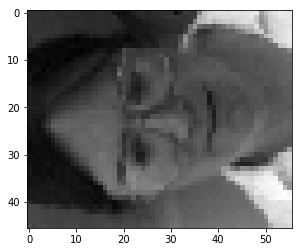

In [5]:
# face data is in 46x56 format

face_157 = np.reshape(face_157,(46,56))

plt.imshow(face_157, cmap = 'gist_gray')

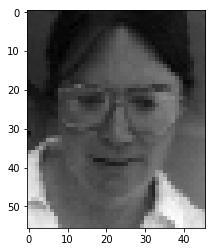

In [6]:
face_157 = face_157.T
plt.imshow(face_157,cmap = 'gist_gray')

In [7]:
face_labels = mat_content['l']
print(face_labels[0,157])

16


In [8]:
print(face_157)
print(face_157.shape)

[[ 55  53  56 ...  70  69  75]
 [ 55  54  54 ...  70  69  66]
 [ 54  55  55 ...  69  70  69]
 ...
 [188 185 176 ... 172 172 168]
 [184 185 180 ... 178 179 168]
 [182 184 184 ... 181 181 174]]
(56, 46)


In [9]:
pixel_row = 21
pixel_column = 33
print(face_157[pixel_row,pixel_column])

104


[105. 108. 122. ...  83.  67.  58.]


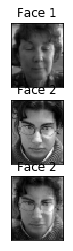

In [10]:
face_1 = face_data[:,5]
face_2 = face_data[:,180]

avg_face = (0.5*face_1 + 0.5*face_2)

plt.subplot(311),plt.imshow(np.reshape(face_1,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 1'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(np.reshape(face_2,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 2'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(np.reshape(avg_face,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 2'), plt.xticks([]), plt.yticks([])

print(avg_face)
plt.show()

(2576,)
(2, 2576)


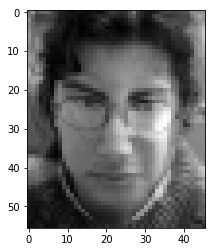

In [11]:
face_stack = np.vstack((face_1,face_2))
print(face_1.shape)
print(face_stack.shape)

avg_face_numpy = np.mean(face_stack, axis = 0)
plt.imshow(np.reshape(avg_face_numpy,(46,56)).T, cmap = 'gist_gray')